In [2]:
import yrs_months
import os
import pandas as pd
import numpy as np
# Changes the notebook working directory on level up.
#%cd ..

# Running main python script.
%run -i "src/main.py"

C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue
analyse gender representation? *takes up to 10 minutes* hit: [y]n


# Study how the catalog changes with the months:

In this part, we wish to study how the catalogue changes per month over the various years. This is to identify (if there are) any patterns in the publication of new content. 

We start off by studying how the overall content is added to the catalogue:

In [5]:
#Work with the overall catalgue:
df = data_set[["type","date_added"]].copy()

#We skip the rows where date_added is unknown,
#because these entries are irrelevant to the pattern of 
#content publication:
df = yrs_months.valid_dates(df)

#We know the current dataset:
df.head(10) #Only displaying top 10. 

,type,date_added
0,Movie,"September 9, 2019"
1,Movie,"September 9, 2016"
2,TV Show,"September 8, 2018"
3,TV Show,"September 8, 2018"
4,Movie,"September 8, 2017"
5,TV Show,"September 8, 2017"
6,Movie,"September 8, 2017"
7,Movie,"September 8, 2017"
8,TV Show,"September 8, 2017"
9,Movie,"September 8, 2017"


Since we wish to create a heatmap for months versus years for added content, we need to extract months and years from the date_added column. Two functions have been defined to do this:

In [7]:
#Get month and years columns:
df = yrs_months.create_month_column(df)
df = yrs_months.create_year_column(df)
df.head(10) #Display to see changes

,type,date_added,month,year
0,Movie,"September 9, 2019",September,2019
1,Movie,"September 9, 2016",September,2016
2,TV Show,"September 8, 2018",September,2018
3,TV Show,"September 8, 2018",September,2018
4,Movie,"September 8, 2017",September,2017
5,TV Show,"September 8, 2017",September,2017
6,Movie,"September 8, 2017",September,2017
7,Movie,"September 8, 2017",September,2017
8,TV Show,"September 8, 2017",September,2017
9,Movie,"September 8, 2017",September,2017


In order to make a heatmap, we convert the dataframe to a dataframe where the index are years and the columns are months. Then, we count the number of times content is added per month per year. A function has been defined to do this:

In [8]:
df_tab = yrs_months.create_table(df)
df_tab #To visualize what the table looks like.

Finally, using this dataframe, we can make a heatmap. A seperate function have been defined for this purpose as well:

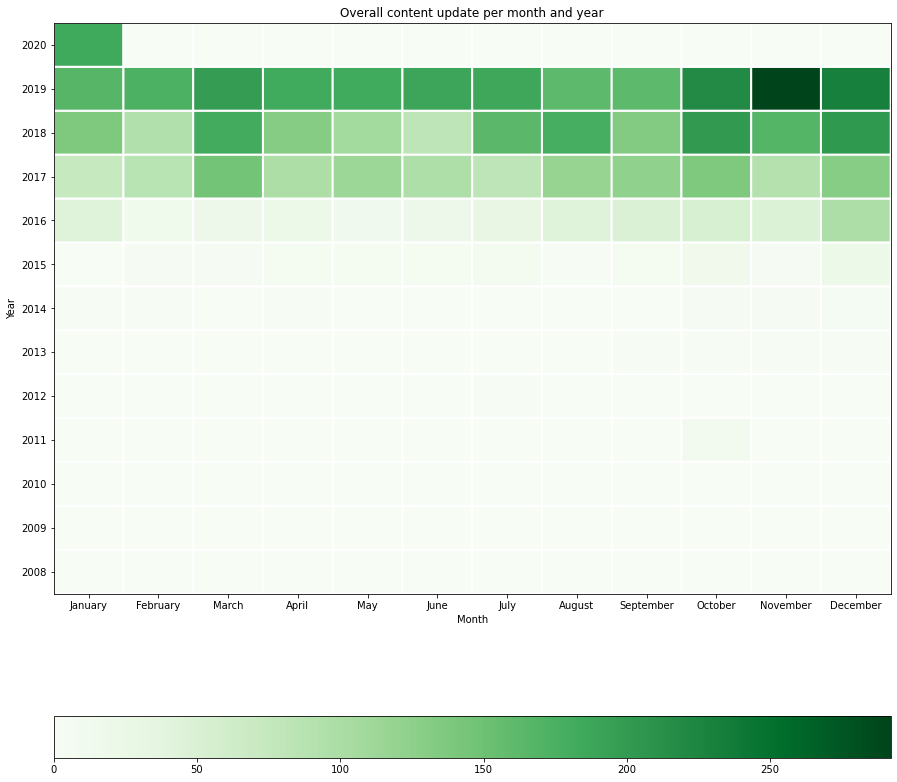

In [11]:
yrs_months.heatmap(df_tab,title="Overall content update per month and year",xlab="Month",ylab="Year")

We see that the amount of content update per month has been steadily increasing since the end of 2016. The figure also clearly indicated that November of 2019 was the month where the most contend were added. If the last total year of data (2019) is considered, we see that there less content beeing added in august and september. Therefore, adding data these months might increase the probability of success, as there is less competition among new content these months.

Now that we have an overall view of the added content on a per month basis, we can closer study when specific content is added to the catalogue.



C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["month"] = dataframe["date_added"].apply(lambda x: x.lstrip().split(" ")[0]) #Remove leading whitespace using lstrip(), then using split by whitespace and extracting the first value
C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["year"

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2014,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015,0.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,4.0,1.0,7.0
2016,1.0,4.0,2.0,5.0,4.0,4.0,13.0,8.0,10.0,16.0,12.0,38.0


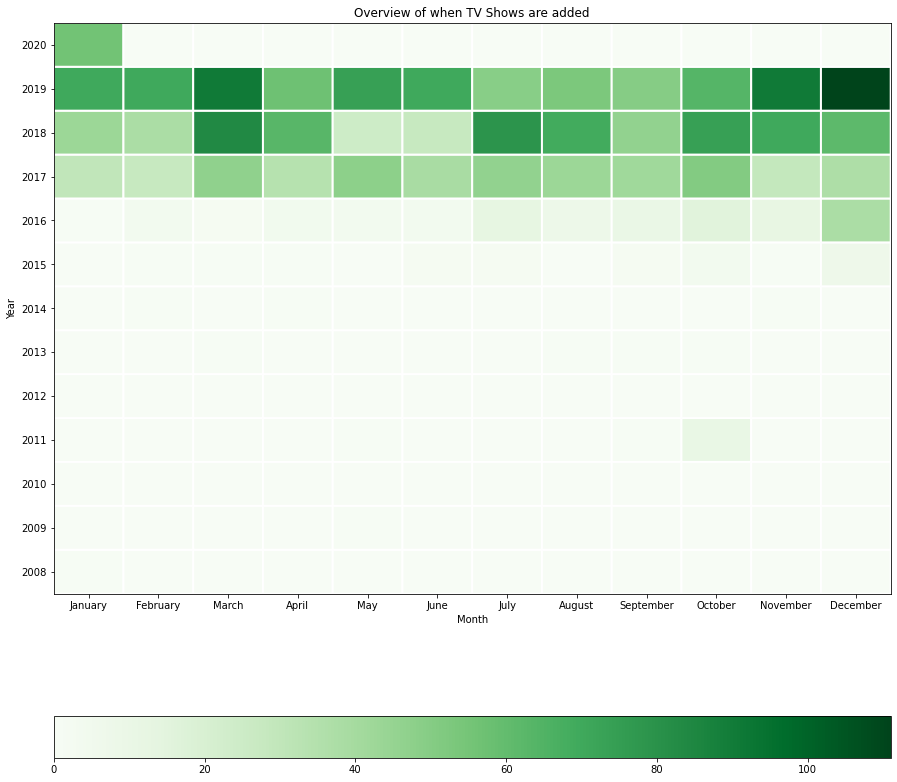

In [17]:
#The entire process above has been defined into a function,
#so we only need to get a relevant dataframe and then the rest is done
#by the function:

#Checking when TV Shows are added: 

df = data_set[["date_added","type"]].copy()
df_shows = df.loc[df["type"] == "TV Show"]

yrs_months.heatplot_analysis(df_dramas,"Overview of when TV Shows are added","Month","Year")
#df_dramas = df_dramas[df_dramas["listed_in"].str.contains("Dramas")]
#df_dramas

We see that for TV Shows, there has been a steady increase in content starting in December 2016. The most TV Shows were added in December of 2019. The amount of content added during this month was over 100 titles, as seen from in the colorscheme. 

Now let us get an overview of when movies have been added:

C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["month"] = dataframe["date_added"].apply(lambda x: x.lstrip().split(" ")[0]) #Remove leading whitespace using lstrip(), then using split by whitespace and extracting the first value
C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["year"

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0
2012,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
2014,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,2.0,5.0
2015,1.0,3.0,3.0,1.0,5.0,4.0,5.0,2.0,6.0,10.0,2.0,16.0
2016,15.0,9.0,15.0,15.0,9.0,11.0,19.0,25.0,29.0,34.0,29.0,54.0


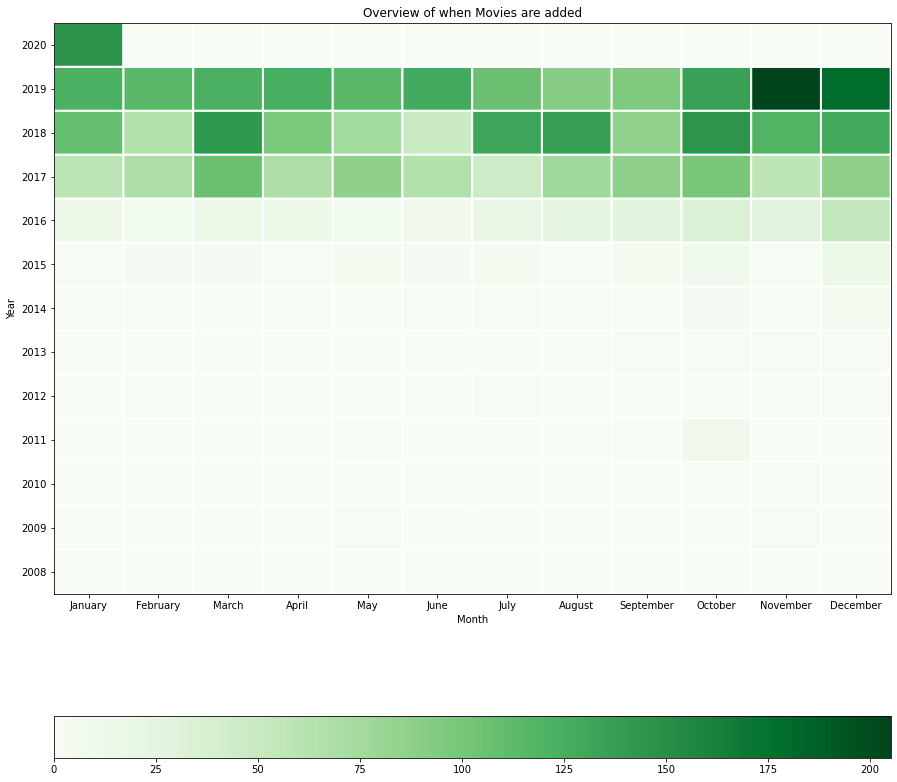

In [19]:
df_movie = df.loc[df["type"] == "Movie"]

yrs_months.heatplot_analysis(df_movie,"Overview of when Movies are added","Month","Year")

From the above figure, we see that November of 2019 was the month were most movies were added to the catalogue. This month, there where over 200 movie titles added. This is approximately twice as many movies added in Novembr 2019 compared to TV shows added in December 2019, which was the month most TV shows were added. This might be because it is easier to produce a movie compared to an enitre TV show. 

Now let us study some genre specific content and see if there are any patterns. 

The first place to start when determining if there are any seasonal patterns in the publication of conent is perhaps the most obvious: christmas content. Naturally, one might expect this content to be added to the catalogue towards christmas (november and december). 

Since Christmas is not a unique genre, we identify christmas movies by extracting all rows where the word "Christmas" is in the description column. 

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


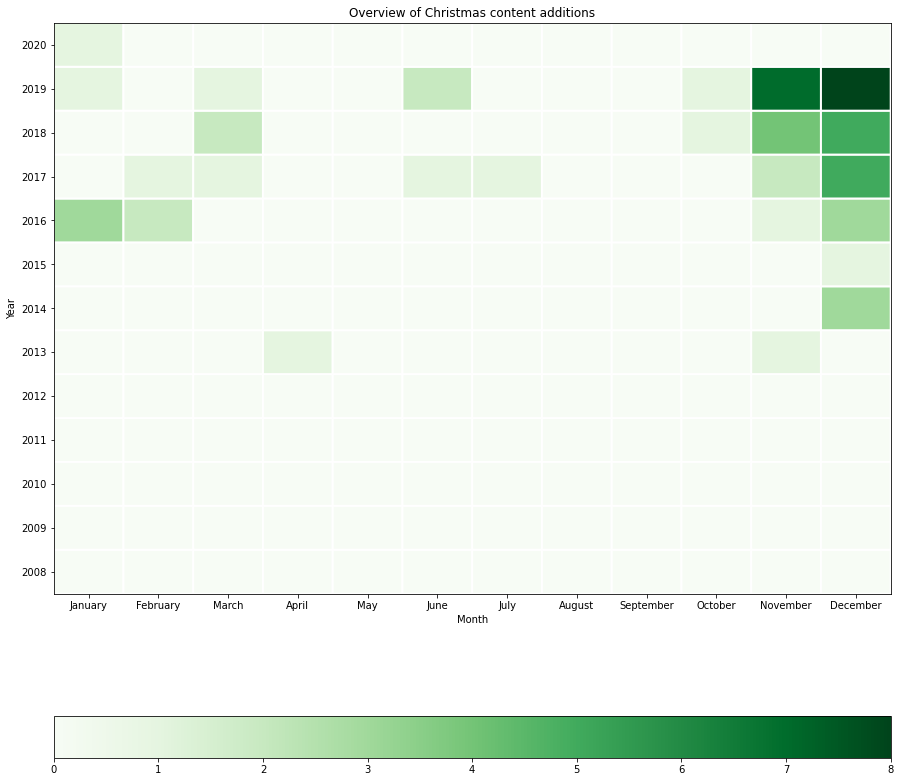

In [20]:
df_xmas = data_set[["date_added","description"]].copy()
df_xmas = df_xmas[df_xmas["description"].str.contains("Christmas")]
yrs_months.heatplot_analysis(df_xmas,"Overview of Christmas content additions","Month","Year")

As seen from the above plot, there is a clear pattern in when Christmas related content is added to the Netflix catalogue. We see that most Christmas content is added in November and December.

Another category that might containt some pattern is Horror, which one might expect to come out before Halloween. Therefore, we check for when Horrer content is added: 

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0
2016,0.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,3.0


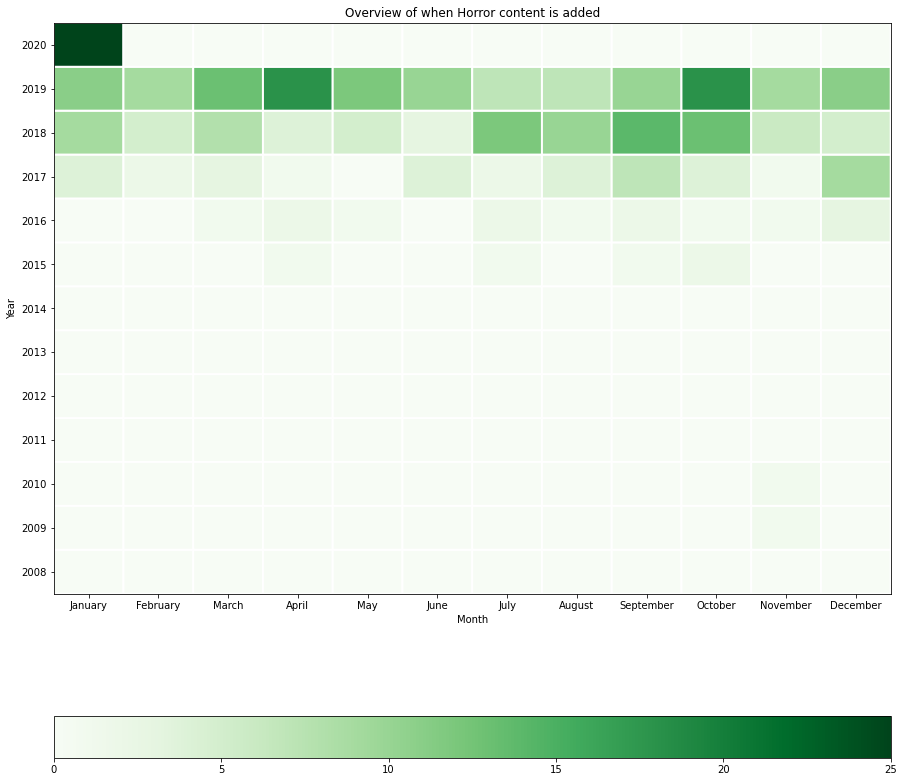

In [21]:
df_horror = data_set[["date_added","listed_in"]].copy()
df_horror = df_horror[df_horror["listed_in"].str.contains("Horror")]
yrs_months.heatplot_analysis(df_horror,"Overview of when Horror content is added","Month","Year")

We see that there is a large addition of Horror content (~25 titles) in January of 2020. Since the dataset stops at January 2020, it is difficult to make conclusions of the pattern of that specific year. By studying 2019, we see that May and October were two months when a significant amount of Horror relted content was added. For 2018, we see that September was the month with the most added Horror content. Thus, there is a weak pattern, but we cannot say definetly that Netflix adds more content before Halloween, as there were added large amounts in May 2019 and January 2020. 

C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["month"] = dataframe["date_added"].apply(lambda x: x.lstrip().split(" ")[0]) #Remove leading whitespace using lstrip(), then using split by whitespace and extracting the first value
C:\Users\aleks\Documents\Utdanning\UiS\DataScience\project\dat540-netflix_catalogue\src\yrs_months.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["year"

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2014,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2015,0.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,4.0,1.0,7.0
2016,1.0,4.0,2.0,5.0,4.0,4.0,13.0,8.0,10.0,16.0,12.0,38.0


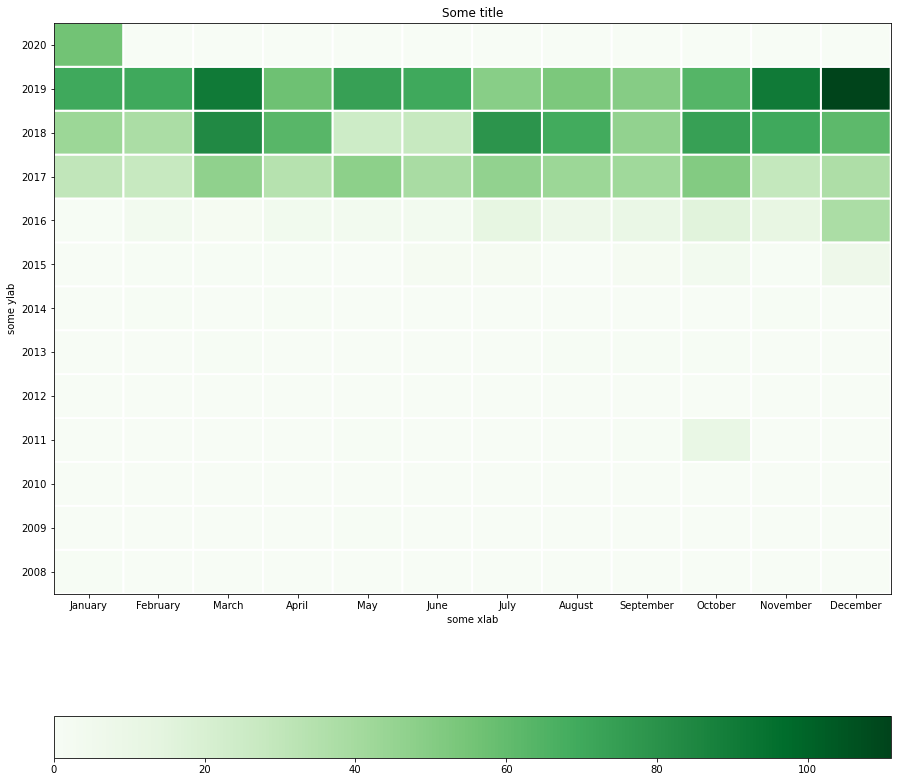

In [13]:
yrs_months.heatplot_analysis(df_dramas,"Some title","some xlab","some ylab")